<a href="https://colab.research.google.com/github/milnico/masterAI4HU/blob/main/Lezione7_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron

Text(0.5, 1.0, 'Random Classification Data with 2 classes')

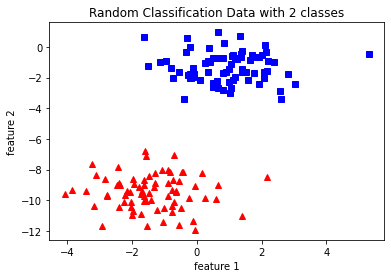

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=150,n_features=2,
                           centers=2,cluster_std=1.05,
                           random_state=2)

#Plotting
fig = plt.figure(figsize=(6,4))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

In [37]:
def step_func(z):
        return 1.0 if (z > 0) else 0.0

def perceptron(X, y, lr, epochs):
    
    # X --> Inputs.
    # y --> labels/target.
    # lr --> learning rate.
    # epochs --> Number of iterations.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = np.shape(X)
    
    # Initializing parameters(weights) to zeros.
    # n+1 in 1 for the bias term.
    weights = np.zeros((1,n+1))
    
    # Empty list to store how many examples were 
    # misclassified at every iteration.
    n_miss_list = []
    
    # Training.
    for epoch in range(epochs):
        
        # variable to store #misclassified.
        n_miss = 0
        
        # looping for every example.
        for idx, x_i in enumerate(X):
            
            # Insering 1 for bias, X0 = 1.
            
            x_i = np.insert(x_i, 0, 1).reshape(n+1,1)
            
            # Calculating prediction/hypothesis.
            y_hat = step_func(np.dot(weights,x_i))
            
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0:
                weights += lr*((y[idx] - y_hat)*x_i.T)
                
                # Incrementing by 1.
                n_miss += 1
        
        # Appending number of misclassified examples
        # at every iteration.
        n_miss_list.append(n_miss)
        
    return weights, n_miss_list

In [49]:
def plot_decision_boundary(X, weights):
    
    # X --> Inputs
    # weights --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = np.array([np.min(X[:,0]), np.max(X[:,0])])
    m = -weights[0,1]/weights[0,2]
    c = -weights[0,0]/weights[0,2]
    print(x1,m,c)
    input("ee")
    x2 = m*x1 + c
    
    # Plotting
    fig = plt.figure(figsize=(6,4))
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')

[-4.07252389  5.30737681] -0.8788270892048553 -5.903733730097342
ee


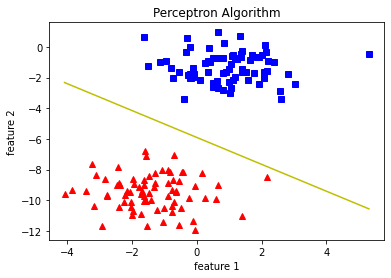

In [50]:
theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)